# Ayden Cook

> **Physics 301**
>
> *26th September, 2022*

---

### Exercise 5: Homework Problem - Flow Over Mountains ###

Simulate a flow going over "mountains". 

- Make a grid $180 \times 40$ 
- Place 1-3 mountains half-way along the flow. The shape of the mountains can be triangular or something more sophisticated. The mountains should not be taller than 20 units high.
- Solve the flow equation and plot the streamlines

---

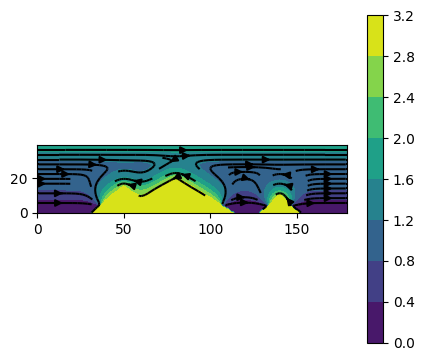

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid Creation
width = 180
height = 40
grid = np.ones(shape=(width,height))

# Initial & Boundary Conditions
grid[:, height-1] = 2 # to establish an initial gradient
grid[:, 0:5] = 0 # ground
for x in range(width): # mountain 1
    for y in range(height):
        if y <= (-np.abs(0.8*(x-50))+15):
            grid[x, y] = 0
for x in range(width): # mountain 2
    for y in range(height):
        if y <= (-np.abs(0.6*(x-80))+20):
            grid[x, y] = 0
for x in range(width): # mountain 3
    for y in range(height):
        if y <= (-np.abs(0.9*(x-140))+10):
            grid[x, y] = 0
            
# Solving Poisson's Equation On the Grid
for i in range(100):
    grid_old = np.copy(grid)
    for x in range(1, width-1): # each column except first & last
        for y in range(1, height-1): # each row except first & last
            grid[x, y] = (1/4)*(grid_old[x+1, y] + grid_old[x-1, y] + grid_old[x, y+1] + grid_old[x, y-1])
    # maintain boundary conditions
    grid[:, 0:5] = 0 # ground
    for x in range(width): # mountain 1
        for y in range(height):
            if y <= (-np.abs(0.8*(x-50))+15):
                grid[x, y] = 3
    for x in range(width): # mountain 2
        for y in range(height):
            if y <= (-np.abs(0.6*(x-80))+20):
                grid[x, y] = 3
    for x in range(width): # mountain 3
        for y in range(height):
            if y <= (-np.abs(0.9*(x-140))+10):
                grid[x, y] = 3
    # maintain continuity at edges of simulation grid
    grid[0, :] = grid[1, :] # left edge
    grid[width-1, :] = grid[width-2, :] # right edge
    
# Calculate Velocity Field
vel_x = np.zeros((width, height))
vel_x[1:-1, 1:-1] = (grid[1:-1, 2:] - grid[1:-1, :-2])/2
vel_y = np.zeros((width,height))
vel_y[1:-1, 1:-1] = -(grid[2:, 1:-1] - grid[:-2, 1:-1])/2.


# Plot Resulting Grid & Streamlines
x, y = np.meshgrid(range(width), range(height))
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(1,1,1)
ax1.set_aspect('equal')
cs = ax1.contourf(x, y, grid.T)
ax1.streamplot(x, y, vel_x.T, vel_y.T, color='k', density=0.5)
fig.colorbar(cs, shrink=0.85)
plt.show()

*Something seems slightly off about my streamlines... what is causing it?*